#### Importing Libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
import datetime as dt
import requests

#### Importing Data and Starting to Explore

In [81]:
df = pd.read_csv('../data/Indoor_Plant_Health_and_Growth_Factors.csv')
df.head()

,Plant_ID,Height_cm,Leaf_Count,New_Growth_Count,Health_Notes,Watering_Amount_ml,Watering_Frequency_days,Sunlight_Exposure,Room_Temperature_C,Humidity_%,Fertilizer_Type,Fertilizer_Amount_ml,Pest_Presence,Pest_Severity,Soil_Moisture_%,Soil_Type,Health_Score
0,Sansevieria cylindrica,17.39,17,8,Yellowing leaves,205,3,3h direct morning sun,21.7,77.5,Organic,82,Fungus gnats,Moderate,51.9,Clay,1
1,Aloe vera,9.84,31,9,NaN,191,1,3h direct morning sun,22.6,68.9,NaN,91,Aphids,Low,28.2,Loamy,2
2,Ficus lyrata,19.82,40,8,Brittle leaves,477,5,Indirect light all day,17.2,44.3,Liquid feed,90,NaN,High,13.6,Sandy,1
3,Monstera deliciosa,37.08,11,1,New bud,207,1,Low light corner,25.0,72.2,Compost,76,Fungus gnats,Low,38.4,Sandy,4
4,Ficus lyrata,2.96,26,3,Wilting,465,2,Filtered sunlight through curtain,23.2,51.6,Compost,37,Fungus gnats,Low,37.9,Peaty,1


In [82]:
df.describe()

,Height_cm,Leaf_Count,New_Growth_Count,Watering_Amount_ml,Watering_Frequency_days,Room_Temperature_C,Humidity_%,Fertilizer_Amount_ml,Soil_Moisture_%,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.723450,27.038000,4.520000,279.337000,3.424000,23.947600,54.707300,48.383000,34.728700,3.040000
std,10.448949,12.743585,2.844942,124.504598,1.755935,3.161621,14.411996,28.530831,14.511833,1.417889
min,-4.140000,5.000000,0.000000,51.000000,1.000000,14.300000,30.000000,0.000000,10.100000,1.000000
25%,19.030000,16.000000,2.000000,174.750000,2.000000,21.700000,42.100000,25.000000,22.200000,2.000000
50%,25.965000,26.000000,5.000000,279.000000,3.000000,23.900000,54.650000,47.000000,34.100000,3.000000
75%,32.627500,38.000000,7.000000,389.000000,5.000000,26.100000,67.100000,73.250000,47.625000,4.000000
max,57.600000,49.000000,9.000000,499.000000,6.000000,34.600000,80.000000,99.000000,59.900000,5.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant_ID                 1000 non-null   object 
 1   Height_cm                1000 non-null   float64
 2   Leaf_Count               1000 non-null   int64  
 3   New_Growth_Count         1000 non-null   int64  
 4   Health_Notes             882 non-null    object 
 5   Watering_Amount_ml       1000 non-null   int64  
 6   Watering_Frequency_days  1000 non-null   int64  
 7   Sunlight_Exposure        1000 non-null   object 
 8   Room_Temperature_C       1000 non-null   float64
 9   Humidity_%               1000 non-null   float64
 10  Fertilizer_Type          805 non-null    object 
 11  Fertilizer_Amount_ml     1000 non-null   int64  
 12  Pest_Presence            798 non-null    object 
 13  Pest_Severity            758 non-null    object 
 14  Soil_Moisture_%          

In [84]:
df.shape

(1000, 17)

In [85]:
df.value_counts('Plant_ID')

Plant_ID
Dracaena trifasciata       59
Monstera deliciosa         56
Aloe vera                  55
Philodendron hederaceum    54
Peperomia obtusifolia      53
Sansevieria cylindrica     52
Aglaonema commutatum       52
Nephrolepis exaltata       52
Chlorophytum comosum       51
Begonia maculata           51
Anthurium andraeanum       50
Epipremnum aureum          49
Schefflera arboricola      49
Spathiphyllum wallisii     49
Zamioculcas zamiifolia     48
Calathea orbifolia         47
Ficus lyrata               46
Codiaeum variegatum        45
Dieffenbachia seguine      41
Tradescantia zebrina       41
Name: count, dtype: int64

In [86]:
df.value_counts('Health_Notes')

Health_Notes
New bud             154
Wilting             129
Yellowing leaves    126
Leaf drop           125
Brittle leaves      121
Strong stem         117
Dark green color    110
Name: count, dtype: int64

In [87]:
df.value_counts('Sunlight_Exposure')

Sunlight_Exposure
3h direct morning sun                219
Filtered sunlight through curtain    206
6h full sun                          202
Indirect light all day               192
Low light corner                     181
Name: count, dtype: int64

In [88]:
df.value_counts('Fertilizer_Type')

Fertilizer_Type
Chemical       216
Liquid feed    202
Compost        196
Organic        191
Name: count, dtype: int64

In [89]:
df.value_counts('Pest_Presence')

Pest_Presence
Whiteflies      212
Spider mites    197
Aphids          196
Fungus gnats    193
Name: count, dtype: int64

In [90]:
df.value_counts('Pest_Severity')

Pest_Severity
Low         264
Moderate    258
High        236
Name: count, dtype: int64

In [91]:
df.value_counts('Soil_Type')

Soil_Type
Clay      173
Chalky    172
Silty     170
Loamy     166
Peaty     160
Sandy     159
Name: count, dtype: int64

In [92]:
df['Soil_Moisture_%'].describe()

count    1000.000000
mean       34.728700
std        14.511833
min        10.100000
25%        22.200000
50%        34.100000
75%        47.625000
max        59.900000
Name: Soil_Moisture_%, dtype: float64

In [93]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

#### I noticed there weren't really any missing values in the columns I cared about. I am trying to focus on the columns where numeric data from sensors can be used to predict plant health at any given time. I then started plotting things I thought would have a strong correlation (I realized later I could do .corr or make a heat map)

In [94]:
graphSet = df[['Plant_ID', 'Room_Temperature_C', 'Health_Score']]

<Axes: xlabel='Room_Temperature_C', ylabel='Health_Score'>

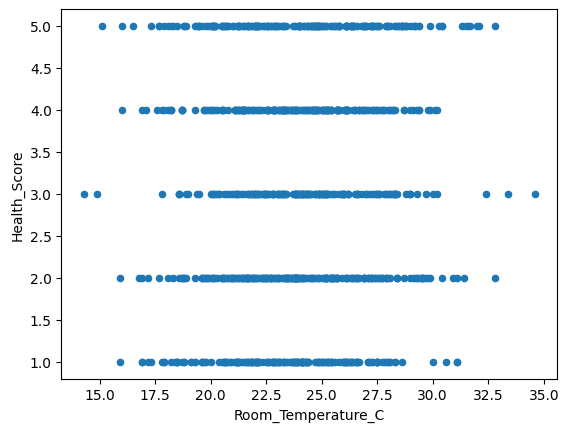

In [95]:
graphSet.plot.scatter(x='Room_Temperature_C', y='Health_Score')

In [96]:
leafTest = df.groupby(df['Leaf_Count'] > 3)

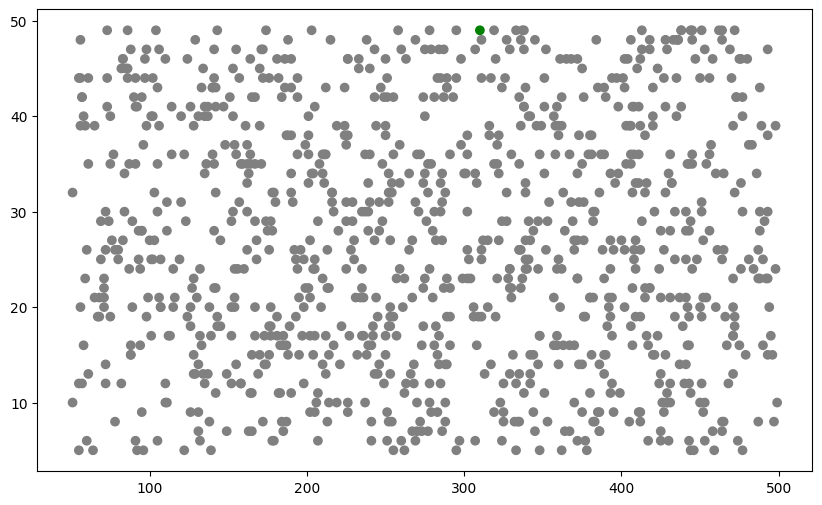

In [97]:
plt.figure(figsize=(10, 6))
max_value = df["Leaf_Count"].idxmax()
colors = ["green" if leaf == max_value else "gray" for leaf in df.index]
plt.scatter(df["Watering_Amount_ml"], df['Leaf_Count'], color=colors)
plt.show()

In [98]:
most_plants = df[df['Plant_ID'] == "Dracaena trifasciata"]
most_plants.head()

,Plant_ID,Height_cm,Leaf_Count,New_Growth_Count,Health_Notes,Watering_Amount_ml,Watering_Frequency_days,Sunlight_Exposure,Room_Temperature_C,Humidity_%,Fertilizer_Type,Fertilizer_Amount_ml,Pest_Presence,Pest_Severity,Soil_Moisture_%,Soil_Type,Health_Score
42,Dracaena trifasciata,29.84,37,4,Wilting,259,5,6h full sun,25.2,76.3,NaN,15,Fungus gnats,Low,51.4,Clay,4
57,Dracaena trifasciata,23.31,19,3,Strong stem,377,2,3h direct morning sun,19.9,44.6,Liquid feed,37,Fungus gnats,High,18.5,Silty,4
79,Dracaena trifasciata,32.47,9,6,Leaf drop,279,3,3h direct morning sun,24.8,76.5,Liquid feed,6,Fungus gnats,High,53.1,Sandy,1
86,Dracaena trifasciata,38.08,23,5,Strong stem,299,1,3h direct morning sun,28.6,57.2,Chemical,31,NaN,Low,37.0,Peaty,5
88,Dracaena trifasciata,21.22,6,2,Leaf drop,132,5,6h full sun,21.9,33.8,Compost,1,Whiteflies,Moderate,31.1,Clay,3


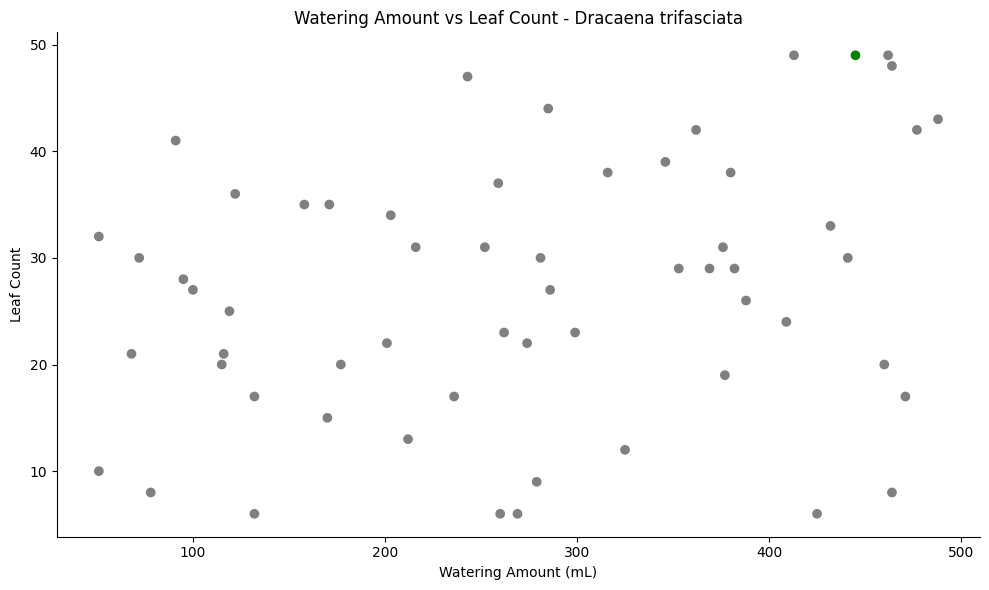

In [99]:
plt.figure(figsize=(10, 6))
max_value = most_plants["Leaf_Count"].idxmax()
colors = ["green" if leaf == max_value else "gray" for leaf in most_plants.index]
plt.scatter(most_plants["Watering_Amount_ml"], most_plants['Leaf_Count'], color=colors)
plt.title("Watering Amount vs Leaf Count - Dracaena trifasciata")
plt.xlabel("Watering Amount (mL)")
plt.ylabel("Leaf Count")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

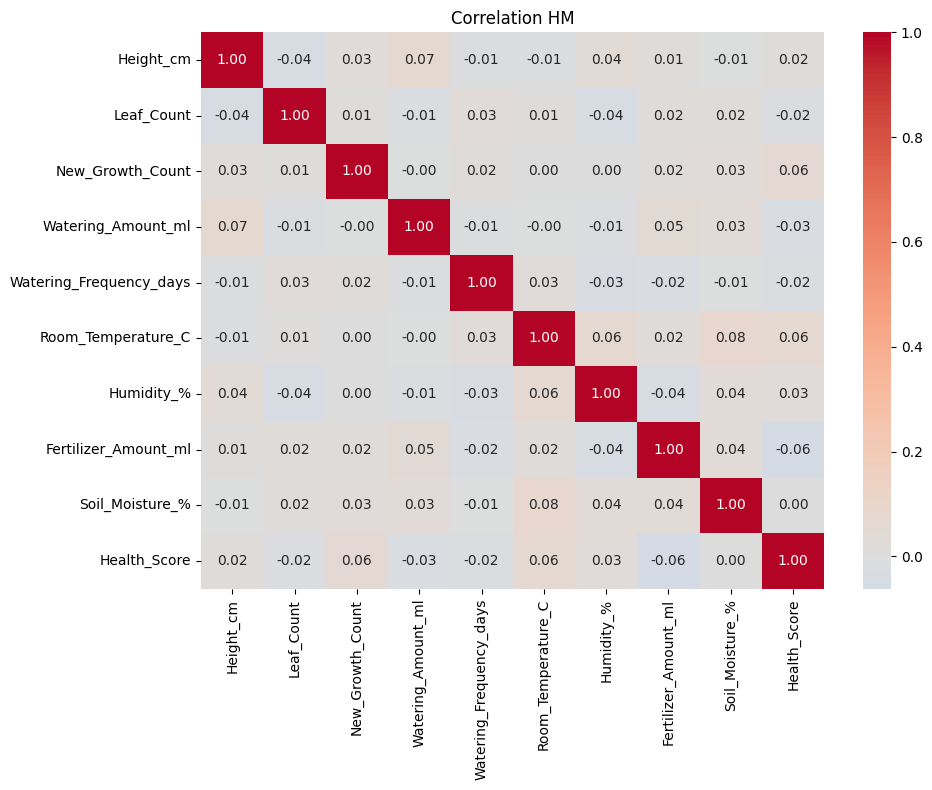

In [100]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation HM")
plt.tight_layout()
plt.show()

#### This was the point that I realized that the data set that I chose was synthetic and I would most likely need to supplement somehow.

#### I was really struggling to find another house plant data set... they were either all synthetic or had weak data, or they weren't tying the data to a health score. Because the original dataset had no correlation between anything basically I figured it would be impossible to merge and make assumptions based on rules to assign a health score.

#### I felt I needed to pivot a bit again, so I found a site that allowed me to export data about plants in the wild. I am mainly interested in the X, Y coordinates of this dataset. My thought was to find where the plant most commonly occurs in the wild, and isolate it to those countries or regions. The same plant is found in different areas of the world or countries, but my thought process is that if it is the most common in one place it is likely thriving there.

#### What I am going to do is use the X, Y coordinates somehow... if I can get weather data based solely on coordinates it may be good to get an average of the coordinates and either get data from them or find the nearest weather station and get data for at least a year. Then I will use that weather data tied to the plant species to develop the "ideal conditions" for house plants.

#### ------------------

#### Importing coordinate/country data and making sure it looks correct

In [101]:
df2 = pd.read_csv('../data/gbif_occurrences.csv')

In [102]:
df2.head()

,input_name,species,lat,lon,year,country
0,Dracaena trifasciata,Dracaena trifasciata,24.507833,120.845436,2025.0,Chinese Taipei
1,Dracaena trifasciata,Dracaena trifasciata,21.234703,-86.802909,2025.0,Mexico
2,Dracaena trifasciata,Dracaena trifasciata,20.466830,-105.292375,2025.0,Mexico
3,Dracaena trifasciata,Dracaena trifasciata,27.871088,-82.262016,2025.0,United States of America
4,Dracaena trifasciata,Dracaena trifasciata,-25.246486,152.667831,2025.0,Australia


In [103]:
df2.value_counts("input_name")

input_name
Aloe vera                  2000
Dieffenbachia seguine      2000
Codiaeum variegatum        2000
Chlorophytum comosum       2000
Tradescantia zebrina       2000
Epipremnum aureum          2000
Philodendron hederaceum    2000
Dracaena trifasciata       2000
Monstera deliciosa         2000
Peperomia obtusifolia      2000
Nephrolepis exaltata       1471
Anthurium andraeanum        767
Ficus lyrata                748
Begonia maculata            377
Aglaonema commutatum        338
Schefflera arboricola       334
Spathiphyllum wallisii      325
Sansevieria cylindrica      278
Zamioculcas zamiifolia      169
Calathea orbifolia           19
Name: count, dtype: int64

In [104]:
df2.drop(columns=['input_name'], inplace=True)
df2.head()

,species,lat,lon,year,country
0,Dracaena trifasciata,24.507833,120.845436,2025.0,Chinese Taipei
1,Dracaena trifasciata,21.234703,-86.802909,2025.0,Mexico
2,Dracaena trifasciata,20.466830,-105.292375,2025.0,Mexico
3,Dracaena trifasciata,27.871088,-82.262016,2025.0,United States of America
4,Dracaena trifasciata,-25.246486,152.667831,2025.0,Australia


In [105]:
philodendron_df = df2[df2['species'] == "Philodendron hederaceum"]
philodendron_df.value_counts("country")

country
Colombia                            410
Mexico                              256
Panama                              230
Costa Rica                          220
Brazil                              199
United States of America            151
Chinese Taipei                       75
Belize                               53
Puerto Rico                          35
Peru                                 33
Singapore                            30
French Guiana                        28
Nicaragua                            27
Australia                            26
Guadeloupe                           21
Suriname                             19
Ecuador                              18
Trinidad and Tobago                  17
Honduras                             17
Hong Kong                            14
Seychelles                           12
Guatemala                            11
El Salvador                          10
Philippines                           6
Indonesia                       

In [106]:
philodendron_colombia = philodendron_df[philodendron_df['country'] == "Colombia"]
philodendron_colombia.head()

,species,lat,lon,year,country
6038,Philodendron hederaceum,5.894380,-74.857612,2025.0,Colombia
6044,Philodendron hederaceum,5.694361,-75.699782,2025.0,Colombia
6050,Philodendron hederaceum,11.131386,-74.119259,2025.0,Colombia
6051,Philodendron hederaceum,11.135275,-74.117570,2025.0,Colombia
6052,Philodendron hederaceum,11.129407,-74.119045,2025.0,Colombia


#### Creating a list of all plant names to use in a function that will return all of their most common countries 

In [107]:
plant_names = []
for plant in df2['species'].unique():
    plant_names.append(plant)

plant_names

['Dracaena trifasciata',
 'Monstera deliciosa',
 'Aloe vera',
 'Philodendron hederaceum',
 'Peperomia obtusifolia',
 'Aglaonema commutatum',
 'Dracaena angolensis',
 'Nephrolepis exaltata',
 'Begonia maculata',
 'Chlorophytum comosum',
 'Anthurium andraeanum',
 'Spathiphyllum wallisii',
 'Schefflera arboricola',
 'Epipremnum aureum',
 'Zamioculcas zamiifolia',
 'Goeppertia orbifolia',
 'Ficus lyrata',
 'Codiaeum variegatum',
 'Dieffenbachia seguine',
 'Tradescantia zebrina']

#### Creating function to get each plant's highest count by country and storing it in a variable
##### Define function that takes in a dataframe and a list
##### Drops any rows that don't contain a country value, then groups the rows by input_name and selects only the country values, then aggregates for each country in the groupby series and gets the mode of the series. If two or more countries tie for the most common, iloc[0] will select the first of those values, which is find for my purpose

In [108]:
def getCountryMode(df, list):
    country_mode = df.dropna(subset='country').groupby('species')['country'].agg(lambda s: s.mode().iloc[0])
    High_Pop_Country_df = df[df['country'] == df['species'].map(country_mode)]
    return High_Pop_Country_df

In [109]:
high_pop = getCountryMode(df2, plant_names)
high_pop.head()

,species,lat,lon,year,country
4,Dracaena trifasciata,-25.246486,152.667831,2025.0,Australia
8,Dracaena trifasciata,-27.433691,152.996961,2025.0,Australia
28,Dracaena trifasciata,-34.053950,151.147339,2025.0,Australia
66,Dracaena trifasciata,-27.492125,152.986496,2025.0,Australia
73,Dracaena trifasciata,-33.799053,151.155211,2025.0,Australia


#### Mapping plants by their X, Y coordinates

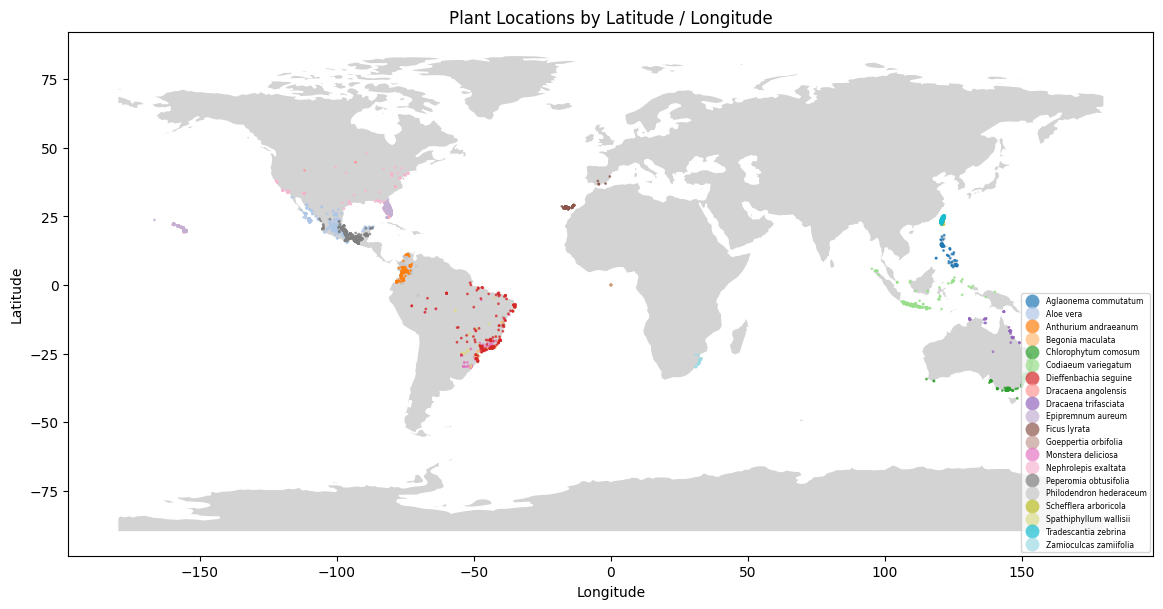

In [110]:
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))


gdf = gpd.GeoDataFrame(
    high_pop,
    geometry=gpd.points_from_xy(high_pop['lon'], high_pop['lat']),
    crs="EPSG:4326"
)


fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax, color="lightgray", edgecolor="white")
gdf.plot(
    ax=ax,
    column="species",
    legend=True,
    legend_kwds={"loc": "lower right", "fontsize": 5.5},
    cmap="tab20",
    markersize=1,
    alpha=0.7
)

ax.set_title("Plant Locations by Latitude / Longitude")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.savefig('../assets/charts/coordinateMap.png')
plt.show()


#### Creating a function that will be applied to groups created by the groupby() function to create a new dataframe called new_columns that will be merged with the gdf dataframe.
##### Calculates the mean longitude and latitude for each group
##### Creates a series called d2 for each row in each group. This is subtracting the average from the lat/long values in each row, squaring those differences, and then adding those values together.
##### This allows us to find the index in the group where the d2 value is smallest using .loc and return the species, lat, and lon columns at that minimum value.

#### Next we isolate the species, lat, and lon columns in gdf. Group them by species, then apply the closest_to_center function to each species group. We drop the existing index and replace it with a new one to keep things clean, and then rename the new columns in preparation for merge with gdf.

In [111]:
def closest_to_center(group):
    lat0 = group["lat"].mean()
    lon0 = group["lon"].mean()
    d2 = (group["lat"] - lat0)**2 + (group["lon"] - lon0)**2
    return group.loc[d2.idxmin(), ["species", "lat", "lon"]]

new_columns = (
    gdf[["species", "lat", "lon"]]
      .groupby("species", group_keys=False)
      .apply(closest_to_center)
      .reset_index(drop=True)
      .rename(columns={"lat": "center_lat", "lon": "center_lon"})
)


/tmp/ipykernel_143235/3991443457.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(closest_to_center)


In [112]:
gdf2 = gdf.merge(new_columns, on="species", how="left")

gdf2.head()


,species,lat,lon,year,country,geometry,center_lat,center_lon
0,Dracaena trifasciata,-25.246486,152.667831,2025.0,Australia,POINT (152.66783 -25.24649),-23.950202,151.373212
1,Dracaena trifasciata,-27.433691,152.996961,2025.0,Australia,POINT (152.99696 -27.43369),-23.950202,151.373212
2,Dracaena trifasciata,-34.053950,151.147339,2025.0,Australia,POINT (151.14734 -34.05395),-23.950202,151.373212
3,Dracaena trifasciata,-27.492125,152.986496,2025.0,Australia,POINT (152.9865 -27.49212),-23.950202,151.373212
4,Dracaena trifasciata,-33.799053,151.155211,2025.0,Australia,POINT (151.15521 -33.79905),-23.950202,151.373212


#### Double checking data types, unique values for year, dropping NA rows for years, converting it to an int to look nicer, and dropping non-needed columns.

In [113]:
gdf2.dtypes

species         object
lat            float64
lon            float64
year           float64
country         object
geometry      geometry
center_lat     float64
center_lon     float64
dtype: object

In [114]:
gdf2['year'].unique()


array([2025., 2024., 2023., 2022., 2021., 2020., 2019., 2018., 2017.,
       2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008.,
       2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999.,
       1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.,
       1989., 1988., 1987., 1986., 1985., 1984., 1983., 1981., 1970.,
       1952., 1914., 1905., 1904., 1903., 1982., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1969., 1968.,
       1967., 1966., 1965., 1964., 1963., 1962., 1961., 1960., 1957.,
       1956., 1955., 1951., 1949., 1947., 1944., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1925., 1924., 1923., 1922., 1920., 1919.,
       1917., 1916., 1915., 1912., 1911., 1910., 1909., 1908., 1907.,
       1906., 1902., 1900., 1896., 1895., 1894., 1893., 1892., 1891.,
       1886., 1877., 1875., 1872., 1849., 1825.,   nan, 1954., 1817.,
       1959., 1945.]

In [115]:
gdf2.dropna(subset=['year'], inplace=True)

In [116]:
gdf2.drop(columns=['geometry', 'lat', 'lon'], inplace=True)
gdf2['year'] = gdf2['year'].astype('int64')
gdf2.head()

,species,year,country,center_lat,center_lon
0,Dracaena trifasciata,2025,Australia,-23.950202,151.373212
1,Dracaena trifasciata,2025,Australia,-23.950202,151.373212
2,Dracaena trifasciata,2025,Australia,-23.950202,151.373212
3,Dracaena trifasciata,2025,Australia,-23.950202,151.373212
4,Dracaena trifasciata,2025,Australia,-23.950202,151.373212


In [117]:
gdf2['year'].value_counts()

year
2025    1233
2024     879
2022     536
2021     381
2023     373
        ... 
1825       1
1954       1
1817       1
1959       1
1945       1
Name: count, Length: 127, dtype: int64

#### Plotting closest to center points to make sure it looks alright

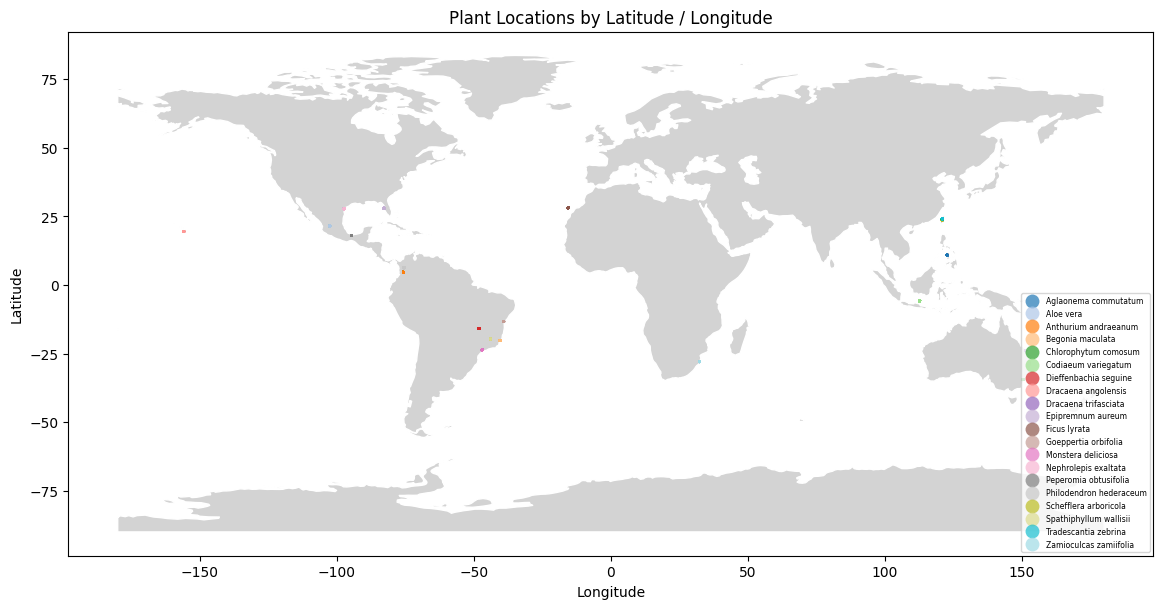

In [118]:
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))


gdf2_center = gpd.GeoDataFrame(
    gdf2,
    geometry=gpd.points_from_xy(gdf2['center_lon'], gdf2['center_lat']),
    crs="EPSG:4326"
)


fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax, color="lightgray", edgecolor="white")
gdf2_center.plot(
    ax=ax,
    column="species",
    legend=True,
    legend_kwds={"loc": "lower right", "fontsize": 5.5},
    cmap="tab20",
    markersize=1,
    alpha=0.7
)

ax.set_title("Plant Locations by Latitude / Longitude")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

#### Defining function to call in .csv creation function below
##### This uses open-meteo, had to get an API key to access some data points/amount of data I needed
##### Fetching weather data by coordinate
##### It returns a dataframe that will be iterated over to have the rows added to a .csv
##### Put placeholder characters in for my API key.

In [119]:
def get_daily_weather(lat, lon, start_date, end_date):
    base_url = "https://customer-archive-api.open-meteo.com/v1/archive"

    params = {
        'latitude': float(lat),
        'longitude': float(lon),
        'start_date': start_date,
        'end_date': end_date,
        'timezone': "UTC",
        'daily': ','.join([
            'temperature_2m_min',
            'temperature_2m_max',
            'relative_humidity_2m_mean',
            'cloudcover_mean',
            'precipitation_sum',
            'soil_moisture_0_to_7cm_mean',
            'soil_temperature_0_to_7cm_mean',
            'sunshine_duration'
        ]),
        'apikey': '###########'
    }

    r = requests.get(base_url, params=params, timeout=60)

    data = r.json()

    daily_weather_df = pd.DataFrame(data["daily"])
    daily_weather_df.rename(columns={'time': 'date'}, inplace=True)
    daily_weather_df['date'] = pd.to_datetime(daily_weather_df['date'])

    return daily_weather_df

#### Creating a new dataframe that only has species, center_lat, and center_lon in it to pass into the next function.
#### Only keeping the first row where a species name appears so that I am only running the next function on a single instance of each plant
#### Checking value counts to make sure that there are no duplicates, and all the plants I was expecting were there.

In [120]:
species_df = gdf2.drop(columns=['year', 'country'])
species_df = species_df.drop_duplicates(subset=['species'], keep='first').reset_index(drop=True)
species_df['species'].value_counts()

species
Dracaena trifasciata       1
Monstera deliciosa         1
Aloe vera                  1
Philodendron hederaceum    1
Peperomia obtusifolia      1
Aglaonema commutatum       1
Dracaena angolensis        1
Nephrolepis exaltata       1
Begonia maculata           1
Chlorophytum comosum       1
Anthurium andraeanum       1
Spathiphyllum wallisii     1
Schefflera arboricola      1
Epipremnum aureum          1
Zamioculcas zamiifolia     1
Goeppertia orbifolia       1
Ficus lyrata               1
Codiaeum variegatum        1
Dieffenbachia seguine      1
Tradescantia zebrina       1
Name: count, dtype: int64

#### Defining a function to export a .csv with the data I requested.
##### Creates and empty list called weather
##### For each row in the data that gets passed in (essentially each plant) it is making the API call with the center_lat and center_lon values in that row and w gets assigned to that API call value
##### Then the species, center_lat, and center_lon get inserted at index 0, 1, 2 in w respectively 
##### After each row in the data that gets passed in is processed (20 rows, since there are 20 plants) it appends the w variable to the weather list.
##### Then I am defining a df that uses pd.concat on the weather variable to organize the list into a table/dataframe

In [121]:
def export_weather_csv(data, start_date, end_date, csv_path):
    weather = []

    for _, row in data.iterrows():
        w = get_daily_weather(lat=row['center_lat'], lon=row['center_lon'], start_date=start_date, end_date=end_date)
        w.insert(0, 'species', row['species'])
        w.insert(1, 'center_lat', row['center_lat'])
        w.insert(2, 'center_lon', row['center_lon'])

        weather.append(w)

    weather_df = pd.concat(weather, ignore_index=True)

    weather_df.to_csv(csv_path, index=False)
    return weather_df

#### Called the method to create the .csv. Fed it the species_df defined above, gave it a start and end date (11 years, figured this would be a good range to weed out any drastic climate change), then had it save to the relative data path where my other data is stored.

##### Commnected it out so that I don't accidentally request data from the API again.

In [122]:
#export_weather_csv(species_df, '2015-01-01', '2025-12-31', '../data/ten_year_weather_by_species.csv')

#### Imported the csv and checked to make sure it looked right, also looked at the unique values for species as a gut check.

In [123]:
eleven_year_weather = pd.read_csv('../data/eleven_year_weather_by_species.csv')
eleven_year_weather.head()

,species,center_lat,center_lon,date,temperature_2m_min,temperature_2m_max,relative_humidity_2m_mean,cloudcover_mean,precipitation_sum,soil_moisture_0_to_7cm_mean,soil_temperature_0_to_7cm_mean,sunshine_duration
0,Dracaena trifasciata,-23.950202,151.373212,2015-01-01,23.6,31.2,75,43,0.7,0.286,29.6,43994.15
1,Dracaena trifasciata,-23.950202,151.373212,2015-01-02,23.6,29.8,75,43,0.8,0.288,28.7,44564.67
2,Dracaena trifasciata,-23.950202,151.373212,2015-01-03,23.0,29.0,74,75,2.4,0.303,27.9,42868.93
3,Dracaena trifasciata,-23.950202,151.373212,2015-01-04,22.4,30.3,67,34,0.2,0.286,28.2,44915.75
4,Dracaena trifasciata,-23.950202,151.373212,2015-01-05,22.4,28.9,73,86,1.1,0.281,27.9,39845.46


In [124]:
eleven_year_weather['species'].unique()

array(['Dracaena trifasciata', 'Monstera deliciosa', 'Aloe vera',
       'Philodendron hederaceum', 'Peperomia obtusifolia',
       'Aglaonema commutatum', 'Dracaena angolensis',
       'Nephrolepis exaltata', 'Begonia maculata', 'Chlorophytum comosum',
       'Anthurium andraeanum', 'Spathiphyllum wallisii',
       'Schefflera arboricola', 'Epipremnum aureum',
       'Zamioculcas zamiifolia', 'Goeppertia orbifolia', 'Ficus lyrata',
       'Codiaeum variegatum', 'Dieffenbachia seguine',
       'Tradescantia zebrina'], dtype=object)

### Creating a quick histogram to demonstrate what questions I am going to start looking into. In this case, what is the distribution of the minimum temperature by day in the region where Dracaena trifasciata? I plan to get more in depth than this, but this is my stopping point before I need to turn in the keystone assignment.

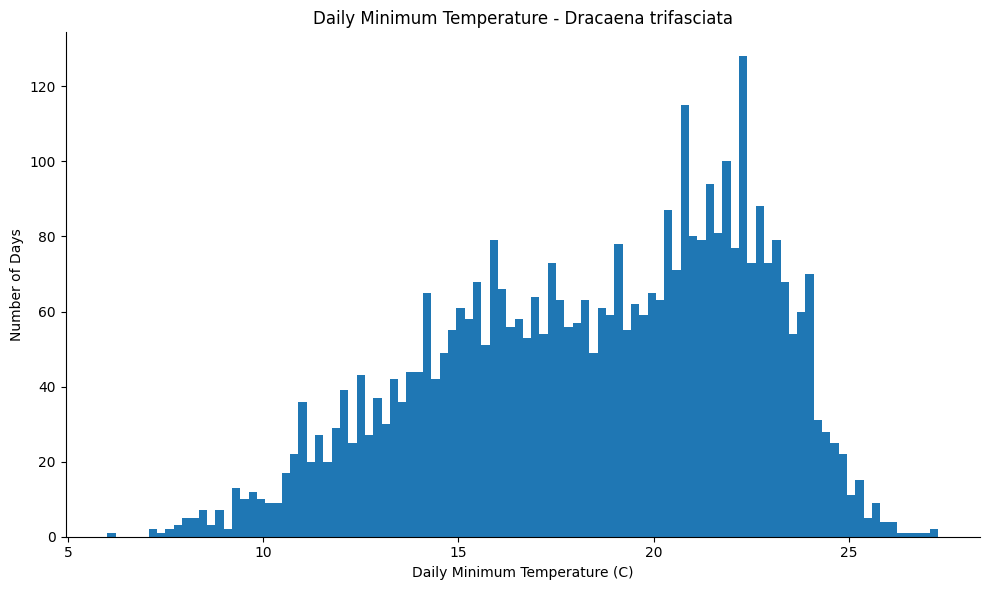

In [125]:
dracaena_test = eleven_year_weather[eleven_year_weather['species'] == 'Dracaena trifasciata']

plt.figure(figsize=(10, 6))
plt.hist(dracaena_test['temperature_2m_min'], bins=100)
plt.title("Daily Minimum Temperature - Dracaena trifasciata")
plt.xlabel("Daily Minimum Temperature (C)")
plt.ylabel('Number of Days')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('../assets/charts/dailyMinTempTestHist.png')
plt.tight_layout()

# NEXT STEPS
### Explore this data in depth
### Start creating new columns where optimal conditions for each plant species can start being defined.
### Work on creating much more interesting/appealing data visualizations.
### Explore how I can take this project further with some machine learning or use hardware/sensors to track our house plants real time and send notifications in real time to our phones to keep them healthier.